In [1]:
import pandas as pd
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def get_avg_of_col(df, parameters, parameter_name, col):
    result = []
    
    for param in parameters:
        series = np.vstack(df.loc[df[parameter_name] == param][col]).apply(literal_eval))
        
        mean = np.mean(series, axis=0)

        result.append(mean)
       
    return result


def get_avg_test_values(df, parameters, parameter_name):
    test_acc = get_avg_of_col(df, parameters, parameter_name, 'test_accs')
    test_loss = get_avg_of_col(df, parameters, parameter_name, 'test_losses')

    return test_acc, test_loss


def make_plot(data, variable, xlabel='', ylabel='', title='', path=''):
    y = np.arange(30) + 1
    
    fig, ax = plt.subplots()
    for X, var in zip(data, variable):
        ax.plot(y, X, '--', label=var)
    ax.set(xlabel=xlabel, ylabel=ylabel , title=title)
    plt.legend()

    if path:
        fig.savefig(path)
    
    plt.show()
    
    
def make_double_plot(data_1, data_2, legend_1, legend_2, xlabel='', ylabel_1='', ylabel_2='', title='', path=''):
    y = np.arange(len(data_1[0])) + 1

    fig, ax = plt.subplots()
    for X in data_1:
        ax.plot(y, X, '--', )
    ax.set(xlabel=xlabel, ylabel=ylabel_1, title=title)

    ax2 = ax.twinx()

    for X in data_2:
        ax2.plot(y, X, ':', )
    ax2.set(ylabel=ylabel_2)

    lines1 = ax.get_lines()
    lines2 = ax2.get_lines()
    legend1 = plt.legend([line for line in lines1], legend_1, loc=2, framealpha=0.5)
    legend2 = plt.legend([line for line in lines2], legend_2, loc=(0.72, 0.1))
    fig.add_artist(legend1)
    fig.add_artist(legend2)
    
    if path:
        plt.savefig(path)

    plt.show()
        


In [19]:
df = pd.read_csv('./1DS/1DS_DP_gridsearch.csv')
df = df.loc[df['max_grad_norm'] == 5.0]
df = df.loc[df['learning_rate'] == 0.0025]

mults = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]

acc, loss = get_avg_test_values(df, mults, 'noise_multiplier')
epsilons = get_avg_of_col(df, mults, 'noise_multiplier', 'epsilons')

# make_plot(loss, mults, xlabel="Epochs", ylabel="Test Loss",
#         title="Test Loss by noise multiplier", path="./1DS/DP_test_loss_noise_mult_2.jpg")
# make_plot(fl_data, lrs, xlabel="Epochs", ylabel="Test Accuracy",
#         title="Federated Learning", path="./1DS/FL_test_acc_lr.jpg")

[[ 0.97087379 30.        ]
 [ 0.92071197 21.        ]
 [ 0.89724919 15.        ]
 [ 0.87378641 12.        ]
 [ 0.85770631 19.        ]
 [ 0.86299892 15.        ]
 [ 0.83066819 18.        ]
 [ 0.822411   14.        ]
 [ 0.80582524 17.        ]]


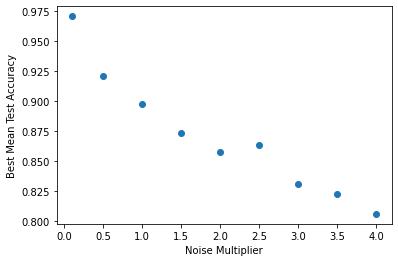

In [41]:
best_accs = np.array([[np.max(a), np.argmax(a) + 1] for a in acc])


print(best_accs)

fig, ax = plt.subplots()
ax.scatter([0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0], best_accs[:,0])
ax.set(xlabel="Noise Multiplier", ylabel="Best Mean Test Accuracy")
plt.savefig("./1DS/best_test_accs_by_noise_mult.jpg")
plt.show()

In [40]:
df = pd.read_csv("./1DS/1DS_DP_val_accs.csv")

best_val_accs = []

for mult in mults:
    series = df.loc[df['noise_multiplier'] == mult]['val_acc']
    best_val_accs.append(np.max(series))
    
print(best_val_accs)

[0.979591836734694, 0.9489795918367347, 0.9081632653061223, 0.9081632653061223, 0.8877551020408163, 0.8945578231292517, 0.8775510204081632, 0.8775510204081632, 0.8435374149659864]


In [5]:
# data_acc = [fl_acc[3], no_fl_acc[3]]
# data_loss = [fl_loss[3], no_fl_loss[3]]

# make_double_plot(data_acc, data_loss, ['FL accuracy', 'No FL accuracy'], ['FL loss', 'No FL loss'])